In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular

In [2]:
import seaborn as sns
sns.set_style("whitegrid")
from IPython.display import display

In [3]:
import os

In [ ]:
environment = dict()
for a in os.environ:
    environment('Var: ', a, 'Value: ', os.getenv(a))
print("all done")

In [ ]:
os.environ['COMPIZ_CONFIG_PROFILE']

In [4]:
%matplotlib inline

In [5]:
df_train = pd.read_csv('train.csv', header=0, delimiter = ",")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [9]:
sex_dict = {'male': 0 , 'female': 1}
df_train['Sex_int'] = df_train['Sex'].map(sex_dict)

## Unsupervised Clustering for Missing Values in Feature: Age

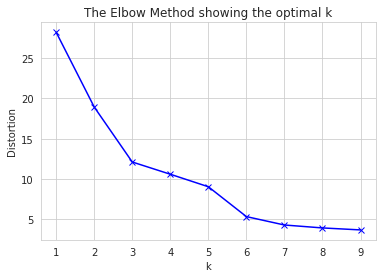

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_train.iloc[:,[1,2,9,12]])
    kmeanModel.fit(df_train.iloc[:,[1,2,9,12]])
    distortions.append(sum(np.min(cdist(df_train.iloc[:,[1,2,9,12]], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_train.iloc[:,[1,2,9,12]].shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 6)

In [12]:
kmeans.fit(df_train.iloc[:,[1,2,9,12]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
prediction_kmeans = kmeans.predict(df_train.iloc[:,[1,2,9,12]])

In [14]:
df_train = pd.concat([df_train, pd.DataFrame(prediction_kmeans, columns = ['Cluster_Age'])], axis = 1)

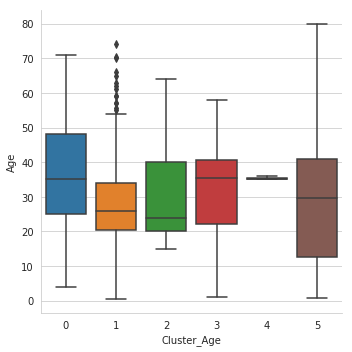

In [15]:
sns.catplot(x = 'Cluster_Age', y = 'Age', data = df_train, kind = 'box')

In [16]:
lkp_age_dict = df_train.groupby('Cluster_Age').agg('mean')['Age'].to_dict()

## Map clusters from dictionary with fill_na to feature: Age

In [17]:
df_train.Age = df_train.Age.fillna(df_train.Cluster_Age.map(lkp_age_dict))

In [18]:
np.median(df_train.Age)

28.229662337662337

In [19]:
df_train['Sex_int']=pd.Categorical(df_train['Sex']).codes

In [20]:
df_train['Cabin_int']=pd.Categorical(df_train['Cabin']).codes

In [21]:
df_train['Embarked_int']=pd.Categorical(df_train['Embarked']).codes

In [22]:
x_train = df_train

## Extends Sex Feature

In [23]:
df_train = pd.concat([df_train,(pd.cut(x_train['Age'], [0, 18,100], labels = ['kid', 'adult']).rename('Family'))], axis = 1)

In [51]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_int,Cluster_Age,Cabin_int,Embarked_int,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,-1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,81,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,-1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,55,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,-1,2,1


In [27]:
family_dict = {'kid': 0, 'adult':1}

In [28]:
df_train['Family'] = df_train['Family'].map(family_dict)

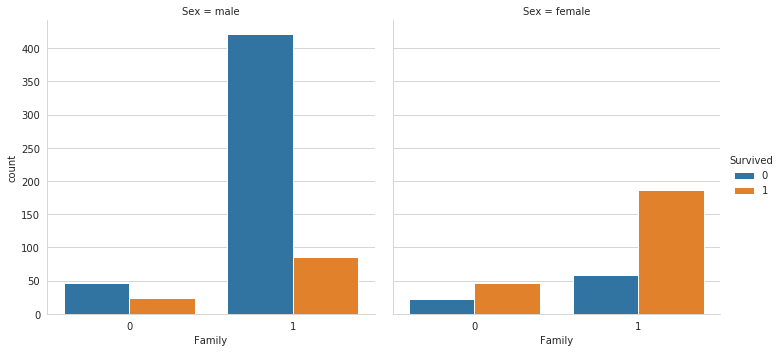

In [30]:
sns.catplot('Family', kind = 'count', data = df_train, hue = 'Survived', col = 'Sex')

In [52]:
x_train = df_train.drop(columns = ['Survived','Name','Sex','Ticket','Cabin', 'Embarked'], axis = 1)

In [32]:
y_train = df_train['Survived']

# Test Datensatz

In [33]:
df_test = pd.read_csv('test.csv', header=0, delimiter = ",")
df_test['Sex_int']=pd.Categorical(df_test['Sex']).codes
df_test['Cabin_int']=pd.Categorical(df_test['Cabin']).codes
df_test['Embarked_int']=pd.Categorical(df_test['Embarked']).codes

In [34]:
x_test = df_test.drop(columns = ['Name','Sex','Ticket','Cabin', 'Embarked'], axis = 1)
y_test = []
x_test['Age'] = x_test['Age'].fillna(np.mean(x_test['Age']))

In [35]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_int',
       'Cluster_Age', 'Cabin_int', 'Embarked_int', 'Family'],
      dtype='object')

In [53]:
x_train.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_int,Cluster_Age,Cabin_int,Embarked_int,Family
0,1,3,22.0,1,0,7.25,1,1,-1,2,1


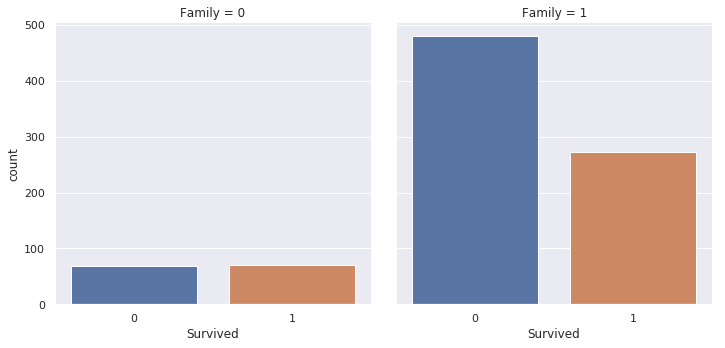

In [37]:
sns.set()
sns.catplot('Survived', data = df_train, kind = 'count', col = 'Family')

/home/malte/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


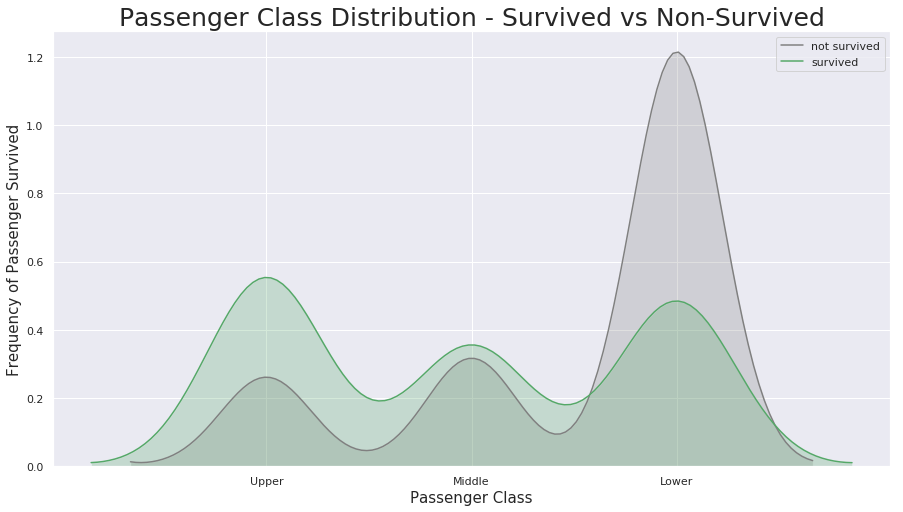

In [38]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(df_train.Pclass[df_train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df_train.Pclass.unique()), labels);

In [39]:
family_map = {'kid': 0,'adult': 1}

In [40]:
x_train['Family'] = x_train['Family'].map(family_map)

In [41]:
x_train.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_int,Cluster_Age,Cabin_int,Embarked_int,Family
0,1,3,22.0,1,0,7.2500,1,1,-1,2,NaN
1,2,1,38.0,1,0,71.2833,0,0,81,0,NaN


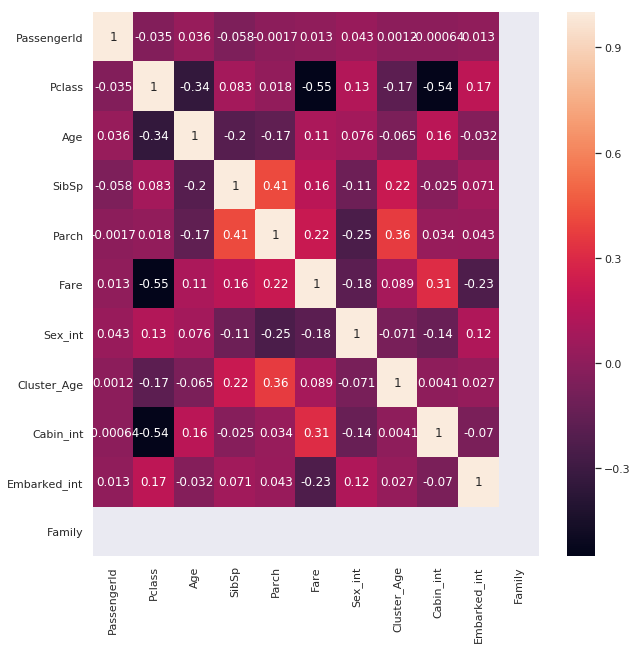

In [42]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(x_train.corr(), annot=True, ax = ax)

In [ ]:
# pclass + fare
# sibSP + parch 
# family  + age

## PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
component_pclass_fare = PCA(n_components = 1).fit_transform(x_train[['Pclass', 'Fare']])

In [45]:
component_sibsp_parch = PCA(n_components= 1).fit_transform(x_train[['SibSp', 'Parch']])

In [130]:
x_train = pd.concat([x_train, pd.Series(component_pclass_fare.reshape(component_pclass_fare.shape[0],), name = "component_pclass_fare"), \
           pd.Series(component_sibsp_parch.reshape(component_sibsp_parch.shape[0],),name = 'component_sibsp_parch')], axis = 1)

In [81]:
x_train.drop(['Pclass','Fare','SibSp','Parch'], axis = 1, inplace = True)

## Move preprocessed data to Models

In [82]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2)

In [166]:
X_train.columns

Index(['Age', 'Sex_int', 'Cluster_Age', 'Cabin_int', 'Embarked_int', 'Family',
       'component_pclass_fare', 'component_sibsp_parch'],
      dtype='object')

In [165]:
X_train.drop('PassengerId', axis = 1, inplace = True)

/home/malte/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [171]:
X_test.drop('PassengerId', axis = 1, inplace = True)

/home/malte/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [305]:
X_train.reset_index(inplace = True)

In [306]:
Sex_new_int = []
for i in range(len(X_train)):
    if np.array(X_train['Family'])[i] == 1:
        Sex_new_int.append(np.array(X_train['Sex_int'])[i])
    else:
        Sex_new_int.append(2)

In [309]:
X_test.reset_index(inplace = True)

In [313]:
Sex_new_int_test = []
for i in range(len(X_test)):
    if np.array(X_test['Family'])[i] == 1:
        Sex_new_int_test.append(np.array(X_test['Sex_int'])[i])
    else:
        Sex_new_int_test.append(2)

In [314]:
X_train = pd.concat([X_train, pd.Series(Sex_new_int,name = 'Sex_new')], axis = 1)

In [315]:
X_test = pd.concat([X_test, pd.Series(Sex_new_int,name = 'Sex_new')], axis = 1)

# regression

## lin reg

In [120]:
from sklearn import linear_model
import statsmodels.api as sm


In [121]:
reg = linear_model.LinearRegression()

In [122]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     68.45
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           7.10e-79
Time:                        18:04:59   Log-Likelihood:                -428.85
No. Observations:                 891   AIC:                             873.7
Df Residuals:                     883   BIC:                             912.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8187      0.054     15.043   

## ada mit ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
alphas = np.logspace(-2, 5, 1000, base=10)
coefs = []
scores=[]
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    scores.append(ridge.score(x_train,y_train))

In [ ]:
np.argmax(np.asarray(scores))

In [ ]:
coefs

In [ ]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

plt.figure()
plt.plot(alphas,scores)

In [ ]:
ridge.set_params(alpha=-2)
ridge.fit(x_train, y_train)

In [ ]:
ridge.predict(x_train)
ridge.coef_
ridge.score(x_train, y_train)

## ada mit lasso

In [ ]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
# ada = sm.OLS(y_train, X2)
OLS.fit_regularized(method='elastic_net', alpha=0.0, L1_wt=1.0)

In [ ]:
ada.summary()

# Ada Grad

In [61]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf_boost = ensemble.GradientBoostingRegressor(**params)

clf_boost.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, clf_boost.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1356


In [62]:
y_pred_boost = np.around(clf_boost.predict(X_test))

In [63]:
accuracy_score(Y_test, y_pred_boost)

0.8044692737430168

# Decision Tree

In [1]:
from sklearn import tree

In [2]:
clf = tree.DecisionTreeClassifier()

In [318]:
clf = clf.fit(X_train, Y_train)

In [319]:
y_pred_dt = clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [320]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred_dt).sum()))

Number of mislabeled points out of a total 712 points : 49


In [321]:
accuracy_score(Y_test, y_pred_dt)

0.7262569832402235

In [70]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [71]:
dot_data = tree.export_graphviz(clf, out_file=None) 

In [72]:
graph = graphviz.Source(dot_data) 

NameError: name 'graphviz' is not defined

In [ ]:
graph.render("titanic") 

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
feature_names=[i for i in X_train.columns],  
class_names= Y_train.name,  
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
predict_clf = lambda x: clf.predict_proba(x).astype(float)

In [ ]:
feature_names = list(X_train.columns)

In [ ]:
col_int = list(X_train.select_dtypes(include=['int']).columns)

In [ ]:
col_float = list(X_train.select_dtypes(include=['float']).columns)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['0','1'],
                                                  categorical_features=col_int,
                                                  categorical_names=col_int,
                                                  kernel_width = 3)

In [ ]:
observation_1 = 100

In [ ]:
exp = explainer.explain_instance(X_test.values[observation_1], predict_ada_grad, num_features= 3)

In [ ]:
exp.show_in_notebook(show_all = True)

# Gaussian Naive Bayes

## https://scikit-learn.org/stable/modules/naive_bayes.html

In [214]:
from sklearn.naive_bayes import GaussianNB

In [215]:
gnb = GaussianNB()

In [216]:
y_pred_bayes = gnb.fit(X_train, Y_train).predict(X_test)

In [218]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred_bayes).sum()))

Number of mislabeled points out of a total 179 points : 39


In [219]:
accuracy_score(Y_test, y_pred_bayes)

0.7821229050279329

# Random Forest Classifier

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred_RFC = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.9887640449438202

In [212]:
accuracy_score(Y_test, y_pred_RFC, normalize=True)

0.8212290502793296

In [213]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred_RFC).sum()))

Number of mislabeled points out of a total 179 points : 32


# knn

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_train, Y_train)

0.851123595505618

In [191]:
accuracy_score(Y_test, y_pred_knn, normalize = True)

0.6927374301675978

# logistic regression

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
y_pred_log = logistic_regression.predict(X_test)
logistic_regression.score(X_train, Y_train)

/home/malte/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

In [194]:
accuracy_score(Y_test, y_pred_log, normalize = True)

0.7541899441340782

# XG Boosting

In [195]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [196]:
DM_train = xgb.DMatrix(data = X_train, 
                       label = Y_train)  
DM_test =  xgb.DMatrix(data = X_test,
                       label = Y_test)

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [231]:
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10,25,50,100,200,1000]
}

In [232]:
gbm = xgb.XGBRegressor()


In [233]:
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)


In [234]:
grid_mse.fit(X_train, Y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprec

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 10, 'n_estimators': 100}
Lowest RMSE found:  0.3922623011822152


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   51.6s finished
/home/malte/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [235]:
pred = grid_mse.predict(X_test)
print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(Y_test, pred)), 2)))

Root mean square error for test dataset: 0.4


In [236]:
accuracy_score(Y_test, np.around(pred), normalize = True)

0.770949720670391

# SVM

In [204]:
from sklearn.svm import SVC, LinearSVC

In [205]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

74.72 %


/home/malte/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# SGD = Stochastic gradient descent

In [206]:
from sklearn.linear_model import SGDClassifier


In [207]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

70.22 %


/home/malte/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


# Neural Net with Keras

In [160]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dense,Dropout, Input
from keras.optimizers import Adam
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'keras'

In [161]:
model = Sequential()

NameError: name 'Sequential' is not defined

In [ ]:
model.add(Dense(9, input_shape=(9,)))
model.add(Activation('relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,to_categorical(Y_train),epochs=100, batch_size=64)
y_pred = model.predict(X_test)
y_test_class = np.argmax(to_categorical(Y_test),axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test_class != y_pred_class).sum()))

In [ ]:
# create model
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=9))
model.add(Activation('relu'))

for i in range(0, 15):
    model.add(Dense(units=128, kernel_initializer='normal',
                     bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dropout(.40))

model.add(Dense(units=2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(X_train, to_categorical(Y_train), epochs=500, verbose=2)